# Spotify Tracks - What makes a song a hit and popular?

### Introduction

It is almost impossible to find a human being who does not like music. The type of music is another matter. Every artist, band, songwriter or producer asks the same question, what makes a song a hit?

### The CRISP-DM Process (Cross Industry Process for Data Mining)
The lessons leading up to the first project are about helping you go through CRISP-DM in practice from start to finish. Even when we get into the weeds of coding, try to take a step back and realize what part of the process you are in, and assure that you remember the question you are trying answer and what a solution to that question looks like.

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

### Business Undestanding

1. What features are necessary for a track to become a hit?
2. Is a track that sounds happier and euphoric is more popular than one that sounds sadder or angry?
3. What features are necessary for a track to be danceable.
4. Why Pink Floyd tracks are not popular than the rest of the tracks that are?

### Understanding de Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import re
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv('data/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
#Getting a concise summary of the tracks DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [9]:
#We also see some stats numbers to undertand the numerical features, we figure out that there is no missing values
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [10]:
#Reescala data duration to minutes, we found some short tracks that are no useful for next analysis step
df['duration_ms'] = df['duration_ms']/1000
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,230.051167,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,126.526087,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,175.093000,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,214.893000,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,263.867000,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5621.218000,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [11]:
#We will take standard duration tracks from 1 minute to 20 minutes
df = df.query('duration_ms>=60 and duration_ms<=1200')

In [12]:
#Because there are a lot useful features, we drop some of them
df_tracks = df.drop(['id','id_artists'], axis = 1)

#Remove brackets and single quotes
df_tracks['artists'] = df_tracks['artists'].str.replace(r'\[|\]|,', '')
df_tracks['artists'] = df_tracks['artists'].str.replace("'","")

df_tracks.head(5)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126.903,0,Uli,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98.200,0,Fernando Pessoa,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181.640,0,Ignacio Corsini,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176.907,0,Ignacio Corsini,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163.080,0,Dick Haymes,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


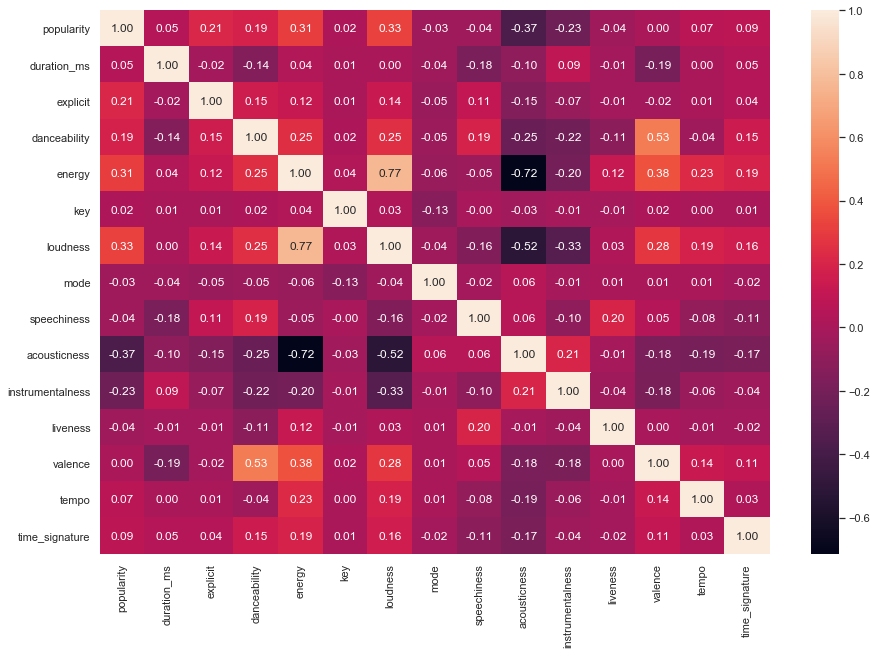

In [13]:
#For data scientists, checking correlations is an important part of the exploratory data analysis process, so in this part
#we plot a heatmap in order to check correlations between numerical features

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_tracks.corr(), annot=True, fmt=".2f",);

### Question 1: What features are necessary for a song to become a hit?

In [14]:
#First we look at the feature popularity, lets plot top 10 popular songs
df_tracks.sort_values(by = 'popularity', ascending=False).head(10)


,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,Peaches (feat. Daniel Caesar & Giveon),100,198.082,1,Justin Bieber Daniel Caesar Giveon,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,drivers license,99,242.014,1,Olivia Rodrigo,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,Astronaut In The Ocean,98,132.780,0,Masked Wolf,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,telepatía,97,160.191,0,Kali Uchis,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,Save Your Tears,97,215.627,1,The Weeknd,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,Blinding Lights,96,200.040,0,The Weeknd,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,Leave The Door Open,96,242.096,0,Bruno Mars Anderson .Paak Silk Sonic,2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,The Business,95,164.000,0,Tiësto,2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,Streets,94,226.987,1,Doja Cat,2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93807,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169.153,0,Riton Nightcrawlers Mufasa & Hypeman Dopamine,2021-01-15,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4


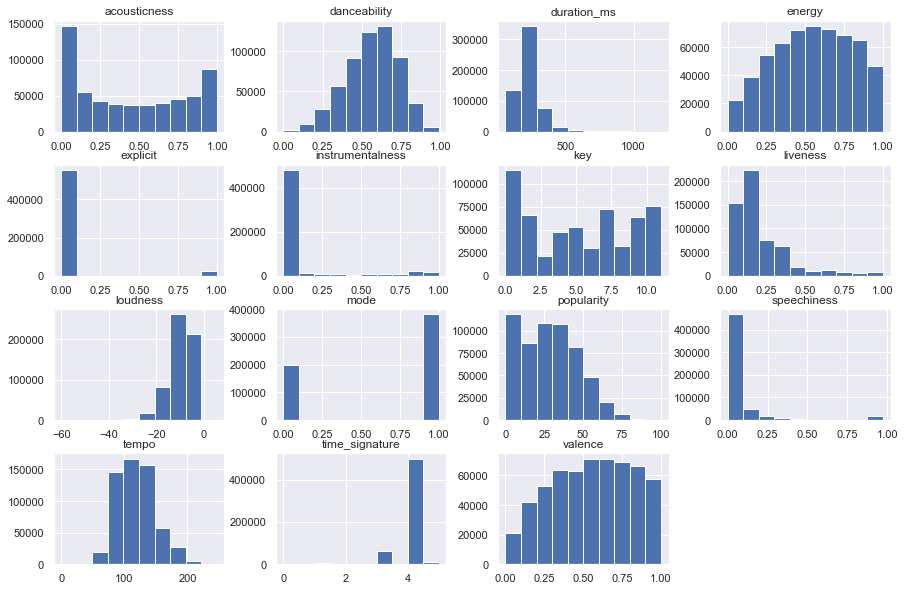

In [15]:
df_tracks.hist();

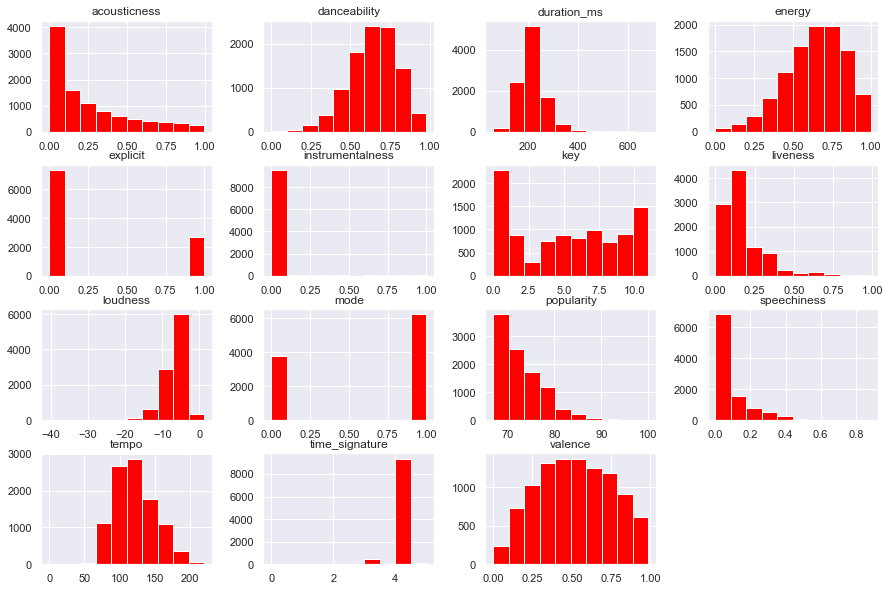

In [16]:
#Now we need to show hist from top 10,000 popular tracks, we want to compare this plot with the one above
df_top_1000 = df_tracks.sort_values(by = 'popularity', ascending=False).head(10000)
df_top_1000.hist(color='red');

In [17]:
#Comparing both hist plots we can consider important features to: acoustiness, energy, explicit, instrumentalness,
#loudness, speechiness, valence


#Grouping data to obtein mean
df_tracks_popular = df_tracks.groupby(by ='popularity').mean().reset_index()
df_tracks_popular

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,220.453136,0.012468,0.526698,0.356908,5.168197,-13.103381,0.694673,0.146765,0.773132,0.340382,0.212993,0.522200,112.232176,3.787187
1,1,220.252313,0.011070,0.515507,0.404108,5.207157,-12.933827,0.672531,0.138318,0.670939,0.249923,0.221637,0.484768,114.764511,3.807517
2,2,214.407670,0.011040,0.524902,0.435065,5.215608,-12.192801,0.680485,0.135253,0.633320,0.233283,0.226340,0.518900,115.667927,3.812534
3,3,213.658417,0.010088,0.518758,0.445226,5.178777,-11.958153,0.670923,0.098603,0.625435,0.214438,0.230638,0.534664,116.048804,3.830673
4,4,215.563190,0.006912,0.521025,0.444092,5.195135,-11.896632,0.677123,0.092822,0.623852,0.187749,0.222136,0.537353,116.074261,3.834508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,221.068000,0.000000,0.550000,0.673000,3.000000,-6.949000,1.000000,0.046100,0.091730,0.000048,0.091200,0.526500,159.546500,4.000000
97,97,187.909000,0.500000,0.666500,0.675000,5.500000,-7.251500,0.500000,0.040550,0.066600,0.000006,0.373000,0.598500,101.010500,4.000000
98,98,132.780000,0.000000,0.778000,0.695000,4.000000,-6.865000,0.000000,0.091300,0.175000,0.000000,0.150000,0.472000,149.996000,4.000000
99,99,242.014000,1.000000,0.585000,0.436000,10.000000,-8.761000,1.000000,0.060100,0.721000,0.000013,0.105000,0.132000,143.874000,4.000000


Now it's time PLOT, each feature vs popularity

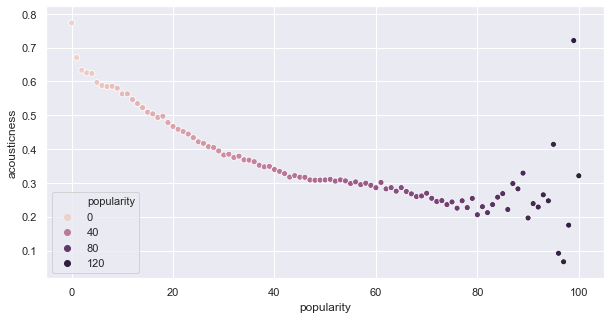

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'acousticness', hue = 'popularity')

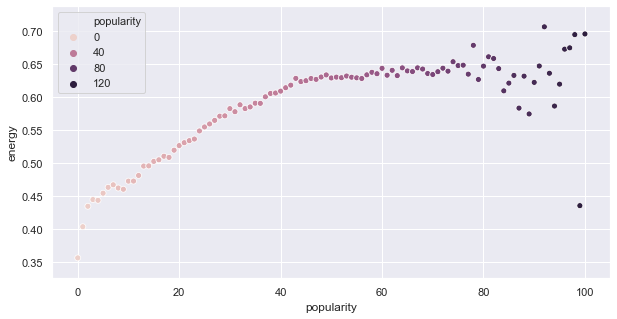

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'energy', hue = 'popularity')

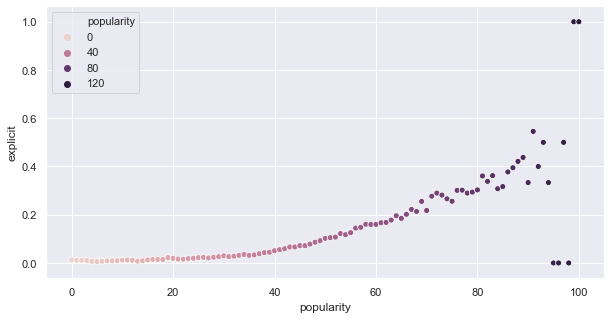

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'explicit', hue = 'popularity')

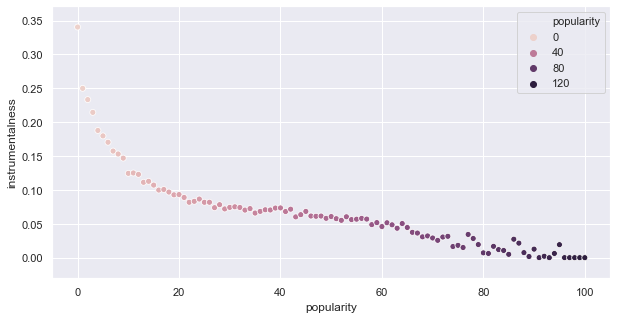

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'instrumentalness', hue = 'popularity')

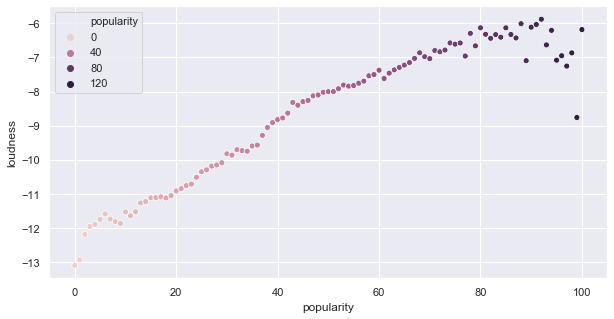

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'loudness', hue = 'popularity')

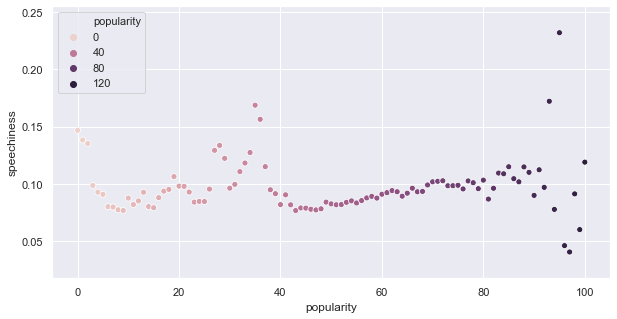

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'speechiness', hue = 'popularity')

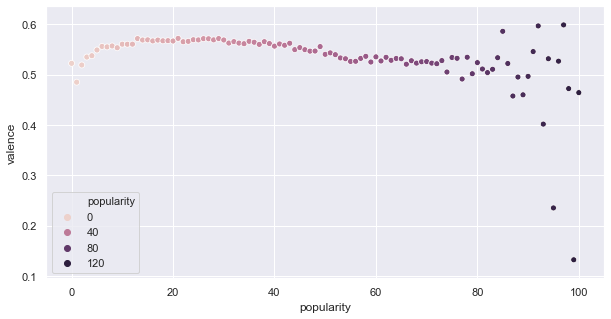

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'valence', hue = 'popularity')

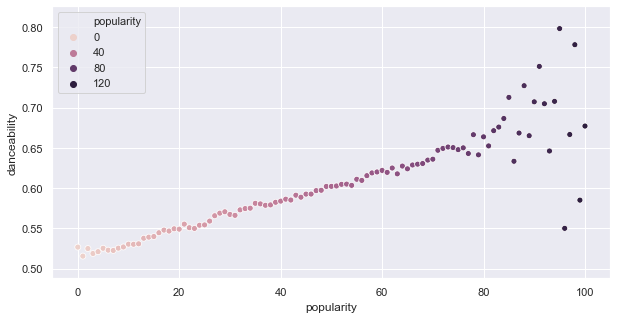

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'danceability', hue = 'popularity')

#### Answer Q1:
Relevant features for a song to become a hit:

- Less Acousticness
- More Energetic
- More Explicit
- Less Instrumental
- Higher Loudness
- More danceable

No relevant features:
- Speechiness
- Valence

### Question 2: Is a song that sounds sadder or angry can be a hit?

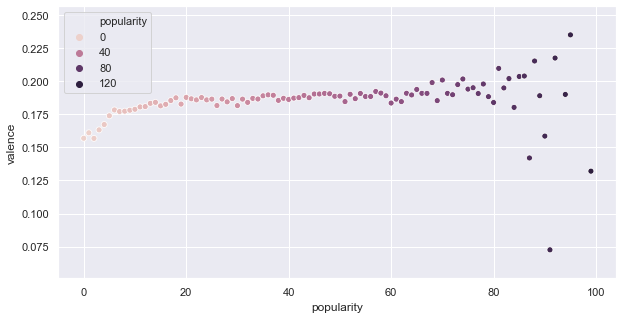

In [26]:
#Subset data to only tracks with valance below 0.3 and then we compare with popularity
sns.set(rc={'figure.figsize':(10,5)})
df_low_valence = df_tracks.query('valence<=0.3')
sns.scatterplot(data = df_low_valence.groupby(by = 'popularity').mean().reset_index(), x = 'popularity', y = 'valence',
                hue = 'popularity')


In [27]:
df_low_valence.sort_values(by = 'popularity', ascending = False).head(10)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93803,drivers license,99,242.014,1,Olivia Rodrigo,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.1320,143.874,4
92814,The Business,95,164.000,0,Tiësto,2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.4140,0.019200,0.1120,0.2350,120.031,4
91866,Streets,94,226.987,1,Doja Cat,2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.2080,0.037100,0.3370,0.1900,90.028,4
93811,Hold On,92,170.813,0,Justin Bieber,2021-03-05,0.658,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.1320,0.2900,139.980,4
92824,DÁKITI,92,205.090,1,Bad Bunny Jhay Cortez,2020-10-30,0.731,0.573,4,-10.059,0,0.0544,0.4010,0.000052,0.1130,0.1450,109.928,4
92832,you broke me first,91,169.266,0,Tate McRae,2020-04-17,0.667,0.373,4,-9.389,1,0.0500,0.7850,0.000000,0.0906,0.0823,124.148,4
93815,What’s Next,91,178.154,1,Drake,2021-03-05,0.781,0.594,0,-6.959,0,0.0485,0.0136,0.000000,0.1620,0.0628,129.895,4
93820,deja vu,90,215.508,1,Olivia Rodrigo,2021-04-01,0.439,0.610,9,-7.236,1,0.1160,0.5930,0.000011,0.3410,0.1720,181.088,4
92847,DÁKITI,90,205.090,1,Bad Bunny Jhay Cortez,2020-11-27,0.731,0.573,4,-10.059,0,0.0544,0.4010,0.000052,0.1130,0.1450,109.928,4
91872,Arcade,89,183.624,0,Duncan Laurence,2019-03-07,0.450,0.329,9,-12.603,0,0.0441,0.8180,0.001090,0.1350,0.2660,71.884,3


#### Answer Q2: 
Yes

### Question 3: What features are important for a song to be danceable?.

In [28]:
#We need to create ranges for valence
df_tracks_dance = df_tracks.groupby(pd.cut(df_tracks['danceability'] , np.arange(0,1.1,0.1))).mean()
df_tracks_dance_range = df_tracks_dance.drop(['danceability'], axis = 1).reset_index()
df_tracks_dance_range['danceability'] = df_tracks_dance_range['danceability'].astype(str)
df_tracks_dance_range


,danceability,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"(0.0, 0.1]",20.755132,321.795202,0.010264,0.194474,4.906891,-21.051243,0.664223,0.048616,0.785000,0.726510,0.181497,0.074347,92.782996,3.680352
1,"(0.1, 0.2]",20.392419,272.082211,0.016663,0.310375,5.108263,-16.332327,0.692360,0.049488,0.696400,0.440691,0.212064,0.152351,108.964273,3.664101
2,"(0.2, 0.3]",21.658576,258.986729,0.017871,0.404202,5.110222,-13.013090,0.681281,0.051431,0.612074,0.241661,0.234441,0.270611,118.476360,3.725806
3,"(0.3, 0.4]",23.555662,248.270521,0.017035,0.463233,5.127142,-11.499696,0.677783,0.056191,0.553872,0.170338,0.240439,0.383145,122.200248,3.791198
4,"(0.4, 0.5]",25.443017,234.662715,0.021041,0.517651,5.197926,-10.413406,0.676960,0.066019,0.494011,0.126205,0.231681,0.474157,122.319985,3.852630
5,"(0.5, 0.6]",27.523619,227.836727,0.026856,0.559607,5.204829,-9.690937,0.673736,0.081643,0.442646,0.092773,0.219218,0.550567,120.054432,3.899326
6,"(0.6, 0.7]",28.827717,218.895282,0.039299,0.578669,5.229435,-9.636042,0.655913,0.138270,0.413292,0.071412,0.208643,0.635359,117.473289,3.905244
7,"(0.7, 0.8]",31.200536,215.147929,0.078188,0.598155,5.313154,-9.256058,0.621862,0.158204,0.367399,0.067473,0.188120,0.699106,115.128325,3.927599
8,"(0.8, 0.9]",35.036409,221.027918,0.159770,0.614772,5.371202,-8.432297,0.602237,0.120035,0.292266,0.072117,0.154358,0.733834,114.896368,3.974091
9,"(0.9, 1.0]",39.447597,212.325064,0.276307,0.596361,5.360576,-7.999949,0.601313,0.145562,0.227490,0.046401,0.136961,0.738216,116.128152,3.984967


In [29]:
# reescalamos los datos
df_dance_range_scale = df_tracks_dance_range.drop(['danceability'], axis = 1)
scaler = MinMaxScaler()
df_dance_range_rescale = pd.DataFrame(scaler.fit_transform( df_dance_range_scale), columns = df_dance_range_scale.columns)
df_dance_range_rescale['danceability'] = df_tracks_dance_range['danceability']
df_dance_range_rescale

,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,danceability
0,0.019035,1.000000,0.000000,0.000000,0.000000,0.000000,0.690960,0.000000,1.000000,1.000000,0.430385,0.000000,0.000000,0.050648,"(0.0, 0.1]"
1,0.000000,0.545876,0.024054,0.275760,0.433701,0.361567,1.000000,0.007958,0.841078,0.579745,0.725789,0.117498,0.547831,0.000000,"(0.1, 0.2]"
2,0.066447,0.426250,0.028594,0.498997,0.437920,0.615889,0.878317,0.025682,0.689825,0.287101,0.942034,0.295636,0.869871,0.192308,"(0.2, 0.3]"
3,0.166004,0.328359,0.025449,0.639450,0.474361,0.731847,0.839896,0.069124,0.585427,0.182231,1.000000,0.465149,0.995946,0.396108,"(0.3, 0.4]"
4,0.265051,0.204052,0.040508,0.768923,0.626809,0.815079,0.830852,0.158800,0.478056,0.117340,0.915364,0.602242,1.000000,0.587562,"(0.4, 0.5]"
5,0.374240,0.141698,0.062366,0.868748,0.641678,0.870435,0.795449,0.301376,0.385923,0.068183,0.794919,0.717339,0.923298,0.733094,"(0.5, 0.6]"
6,0.442677,0.060018,0.109138,0.914101,0.694671,0.874641,0.599688,0.818098,0.333271,0.036774,0.692725,0.845064,0.835911,0.751538,"(0.6, 0.7]"
7,0.567201,0.025787,0.255312,0.960463,0.874980,0.903756,0.225701,1.000000,0.250953,0.030982,0.494390,0.941086,0.756520,0.821208,"(0.7, 0.8]"
8,0.768504,0.079500,0.561961,1.000000,1.000000,0.966873,0.010148,0.651702,0.116189,0.037811,0.168121,0.993399,0.748667,0.966105,"(0.8, 0.9]"
9,1.000000,0.000000,1.000000,0.956195,0.977114,1.000000,0.000000,0.884640,0.000000,0.000000,0.000000,1.000000,0.790370,1.000000,"(0.9, 1.0]"


In [30]:
df_dance_melt = df_dance_range_rescale.melt(id_vars = ['danceability'], var_name = 'feature', value_name = 'Value')
df_dance_melt


,danceability,feature,Value
0,"(0.0, 0.1]",popularity,0.019035
1,"(0.1, 0.2]",popularity,0.000000
2,"(0.2, 0.3]",popularity,0.066447
3,"(0.3, 0.4]",popularity,0.166004
4,"(0.4, 0.5]",popularity,0.265051
...,...,...,...
135,"(0.5, 0.6]",time_signature,0.733094
136,"(0.6, 0.7]",time_signature,0.751538
137,"(0.7, 0.8]",time_signature,0.821208
138,"(0.8, 0.9]",time_signature,0.966105


In [31]:
df_dance_melt.describe()

,Value
count,140.000000
mean,0.504925
std,0.365123
min,0.000000
25%,0.117052
50%,0.554896
75%,0.842075
max,1.000000


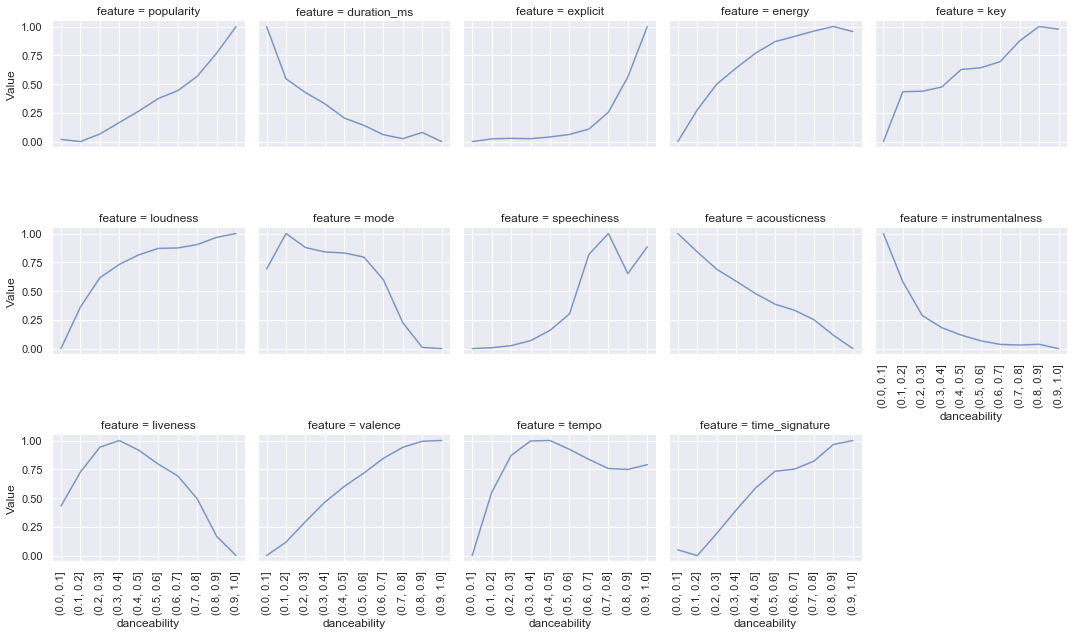

In [32]:
#Plot all features with danceability range
g = sns.FacetGrid(df_dance_melt, col="feature", col_wrap = 5)
g.map(sns.lineplot, "danceability", "Value", alpha=.7)
for axes in g.axes.flat:
    _ = g.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

#### Answer Q3: 
Features for a song to be danceable:
- Popularity
- Explicit
- Energy
- Loudness
- Valence

### Question 4: Why Pink Floyd songs are not popular than the rest of the songs that are?

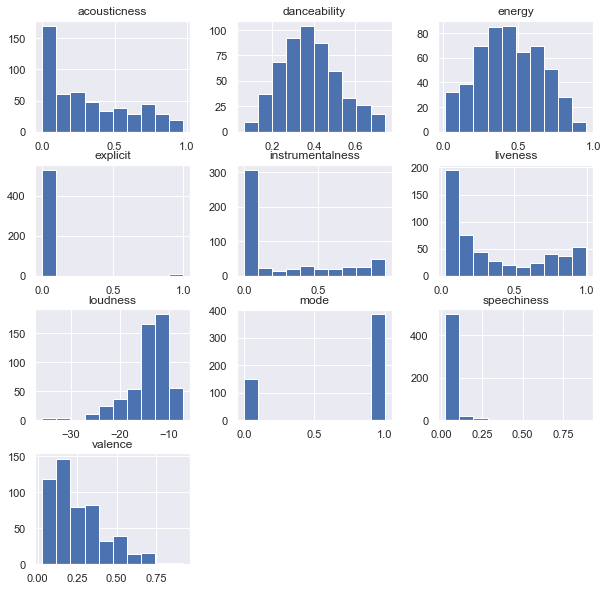

In [33]:
#Plot some hist from pink floy songs
sns.set(rc={'figure.figsize':(10,10)})
df_pink_floyd = df_tracks.query("artists == 'Pink Floyd'").drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_pink_floyd.hist();


In [34]:
df_pink_floyd_mean = df_pink_floyd.groupby(by='artists').mean().transpose()
df_pink_floyd_mean

artists,Pink Floyd
explicit,0.013109
danceability,0.383151
energy,0.442657
loudness,-14.293253
mode,0.719101
speechiness,0.055556
acousticness,0.323549
instrumentalness,0.251432
liveness,0.370972
valence,0.258692


In [35]:
#drop columns that are not important, select only songs win popuparilty above 80 points
df_tracks_80_popular = df_tracks[df_tracks['popularity']>=80].drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_tracks_80_popular['artists'] = '80 popularity'

df_pink_floyd_mean['80 popularity'] = df_tracks_80_popular.groupby(by='artists').mean().transpose()['80 popularity']

#append two columns
df_comparing = df_pink_floyd_mean.reset_index()
df_comparing.columns = ['Feature','Pink Floyd', '80 Popularity']
df_comparing['Diff'] = df_comparing['80 Popularity']-df_comparing['Pink Floyd']
df_comparing

,Feature,Pink Floyd,80 Popularity,Diff
0,explicit,0.013109,0.343816,0.330707
1,danceability,0.383151,0.671532,0.288381
2,energy,0.442657,0.640672,0.198015
3,loudness,-14.293253,-6.297527,7.995726
4,mode,0.719101,0.597484,-0.121617
5,speechiness,0.055556,0.101604,0.046048
6,acousticness,0.323549,0.232465,-0.091084
7,instrumentalness,0.251432,0.010599,-0.240833
8,liveness,0.370972,0.170120,-0.200852
9,valence,0.258692,0.517347,0.258654


In [36]:
#Plot diff values
df_comparing.sort_values(by = 'Diff', ascending = False).style.bar(subset=['Diff'], align = 'mid')

,Feature,Pink Floyd,80 Popularity,Diff
3,loudness,-14.293253,-6.297527,7.995726
0,explicit,0.013109,0.343816,0.330707
1,danceability,0.383151,0.671532,0.288381
9,valence,0.258692,0.517347,0.258654
2,energy,0.442657,0.640672,0.198015
5,speechiness,0.055556,0.101604,0.046048
6,acousticness,0.323549,0.232465,-0.091084
4,mode,0.719101,0.597484,-0.121617
8,liveness,0.370972,0.170120,-0.200852
7,instrumentalness,0.251432,0.010599,-0.240833


#### Answer Q4: 
Features were Pink Floyd fails
- loudness
- explicit
- danceability
- valance
- energy

### Fuentes
1. https://www.muyinteresante.com.mx/preguntas-y-respuestas/porque-gusta-musica/#:~:text=Las%20melod%C3%ADas%20afectan%20a%20nuestro%20cerebro%2C%20suscitando%20respuestas%20emocionales.&text=Al%20mismo%20tiempo%2C%20se%20despiertan,se%20generan%20en%20nuestra%20mente.
2. https://www.hispasonic.com/noticias/hace-cancion-sea-exito/43900
